# Beautiful Plots.

The goal of data visualization is to transform numbers into insights. However, default data visualization output often disappoints. This is how a default matplotlib plot looks :

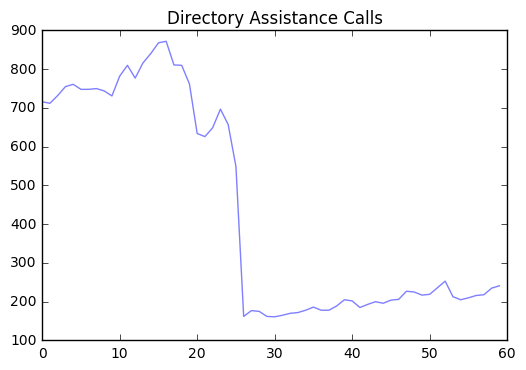

In [2]:
import matplotlib.pylab as plt
%matplotlib inline

signal = [350,339,351,364,369,331,331,340,346,341,357,398,381,367,383,375,353,361,375, \
          371,373,366,382,429,406,403,429,425,427,409,402,409,419,404,429,463,428,449, \
          444,467,474,463,432,453,462,456,474,514,489,475,492,525,527,533,527,522,526, \
          513,564,599,572,587,599,601,611,620,579,582,592,581,630,663,638,631,645,682, \
          601,595,521,521,516,496,538,575,537,534,542,538,547,540,526,548,555,545,594, \
          643,625,616,640,625,637,634,621,641,654,649,662,699,672,704,700,711,715,718, \
          652,664,695,704,733,772,716,712,732,755,761,748,748,750,744,731,782,810,777, \
          816,840,868,872,811,810,762,634,626,649,697,657,549,162,177,175,162,161,165, \
          170,172,178,186,178,178,189,205,202,185,193,200,196,204,206,227,225,217,219, \
          236,253,213,205,210,216,218,235,241]
signal=signal[120:180]
plt.plot(signal, alpha = 0.5)
plt.title('Directory Assistance Calls')
import numpy as np
x = np.linspace(1,180,180)[120:180]

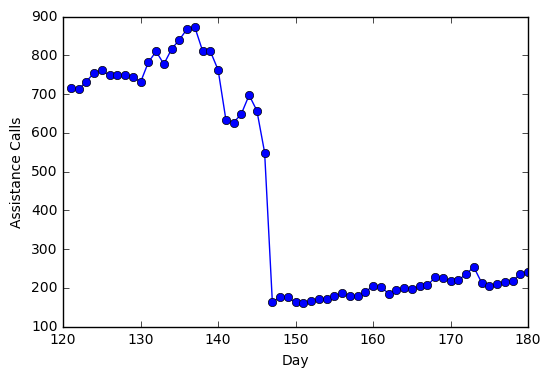

In [3]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, signal, '-o')
ax.set_xlabel('Day')
ax.set_ylabel('Assistance Calls')

According to Edward Tufte, 

> “Ink that fails to depict statistical information does not have much interest to the viewer.”

One example of not using unnecessary “ink” is the X axis of our plot. One alternative to using spines is to fill the plot area with a pale neutral color.

By merely importing `seaborn`, you can improve the plot’s aesthetics.

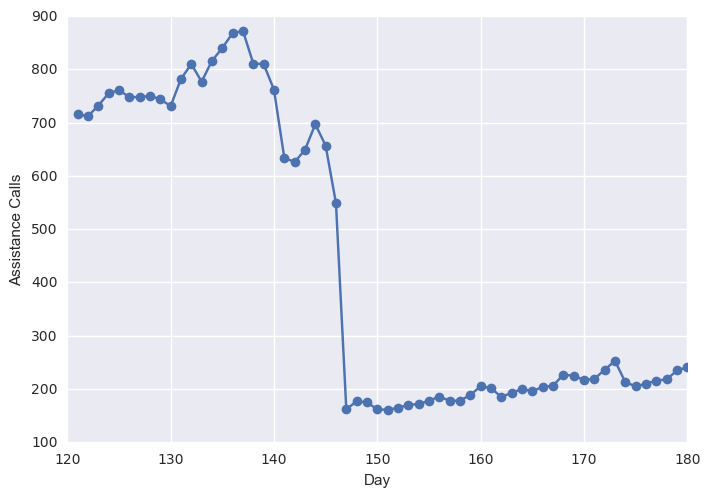

In [4]:
import seaborn as sns
fig, ax = plt.subplots(1, 1)
ax.plot(x,signal, '-o')
ax.set_ylabel('Assistance Calls')
ax.set_xlabel('Day')

If you plan to use the graph in a printed or on-screen document, we may use the same color to fill the entire plot area. By doing so, we help the reader to distinguish between the plot and the accompanying text:

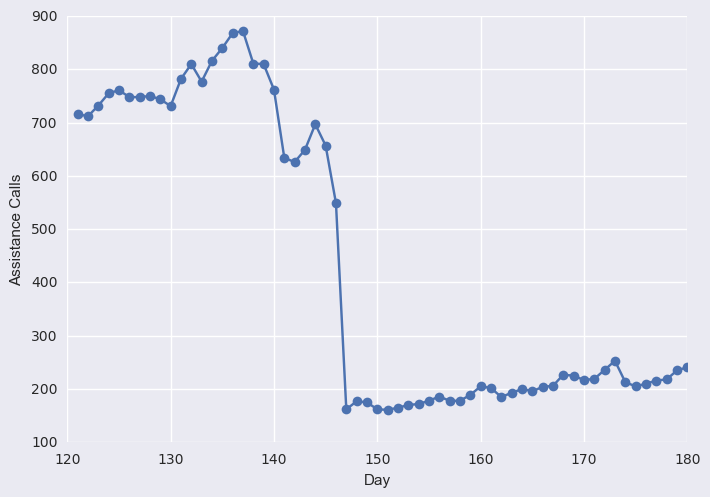

In [5]:
fig, ax = plt.subplots(1, 1)
fig.set_facecolor('#EAEAF2')
ax.plot(x, signal, '-o')
ax.set_ylabel('Assistance Calls')
ax.set_xlabel('Day')

Between days, there is no data. To reflect this, a step plot is a better choice for the data. In `matplotlib`, one of the arguments to the step function is the step position. We can use the `post` option so that the line bends at the end of the day. 

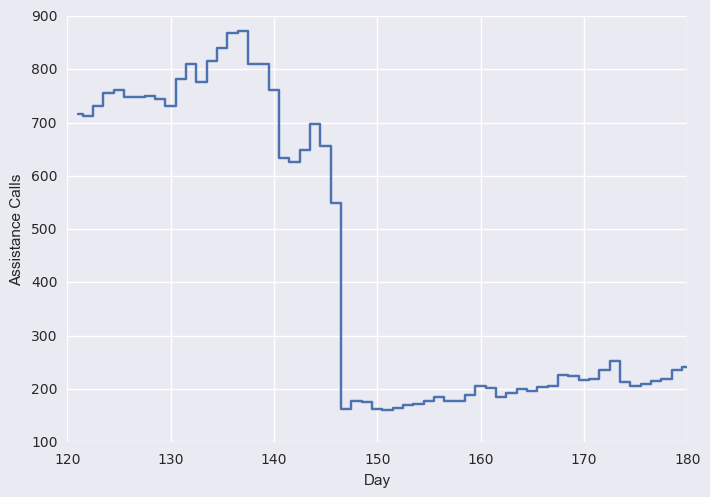

In [6]:
fig, ax = plt.subplots(1, 1)
ax.step(x,signal, where='mid')
fig.set_facecolor('#EAEAF2')
ax.set_ylabel('Assistance Calls')
ax.set_xlabel('Day')

Let's change the aspect ratio:

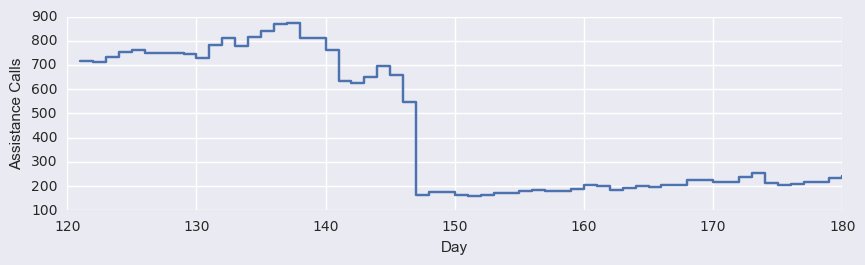

In [7]:
figsize=(10, 2.5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
fig.set_facecolor('#EAEAF2')
ax.step(x,signal, where='post')
ax.set_ylabel('Assistance Calls')
ax.set_xlabel('Day')

Rotated text labels are a serious readability problem: different studies show that rotated text slows short phrase reading by 54% up to 200%. Fortunately, fixing such a problem is relatively easy with matplotlib:

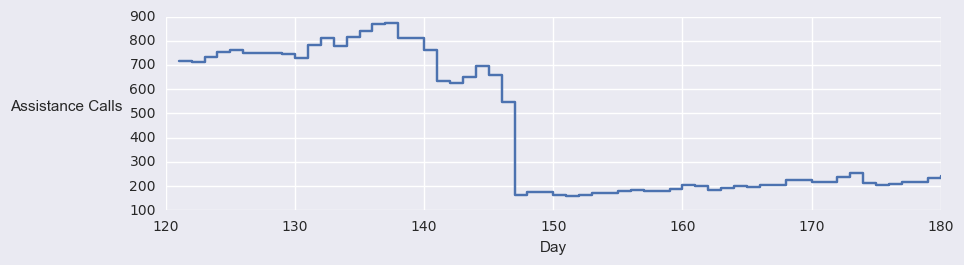

In [8]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
fig.set_facecolor('#EAEAF2')
ax.step(x,signal, where='post')
ax.set_ylabel('Assistance Calls', 
              rotation=0,
              ha='right', # horizontal alignment
             )
ax.set_xlabel('Day')

We can reduce the number of ticks on the Y axis. Four ticks are sufficient to provide axis dimensions, as well as to demonstrate the fact that the axis is linear and not, for example, logarithmic.

In [9]:
def fewer_ticks(ax, xy='xy', nticks=3, decimals=None):
    for letter in list(xy):
        if letter.lower() == 'x':
            getlim = ax.get_xlim
            setticks = ax.set_xticks
        elif letter.lower() == 'y':
            getlim = ax.get_ylim
            setticks = ax.set_yticks
        else:
            raise RuntimeError()
        lm = getlim()
        ticks = np.linspace(lm[0], lm[1], nticks)
        if decimals is not None:
            ticks = np.round(ticks, decimals)
        setticks(ticks)

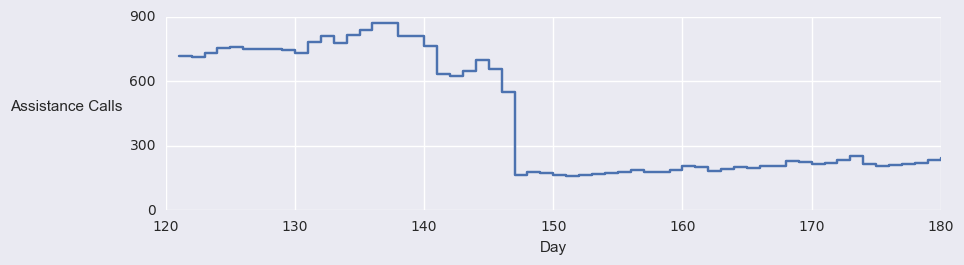

In [10]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
fig.set_facecolor('#EAEAF2')
ax.step(x,signal, where='post')
ax.set_ylabel('Assistance Calls', 
              rotation=0,
              ha='right', # horizontalalignment
              ma='left', # multiline alignment
             )
ax.set_xlabel('Day')
ax.set_ylim(0, 900)
fewer_ticks(ax, xy='y', decimals=1, nticks=4) 

To make it easier to locate the relevant part of the graph the graph, we can emphasize the relevant data by using a different color:

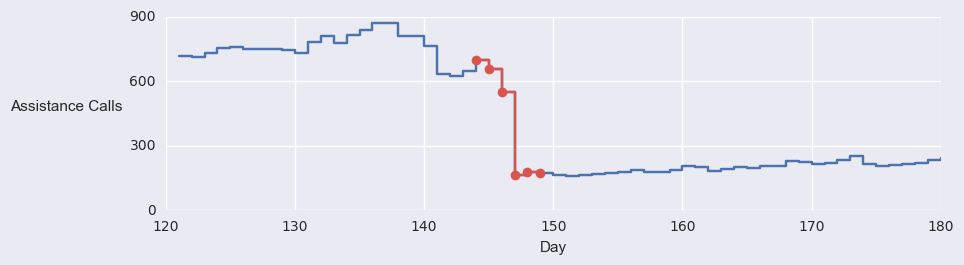

In [11]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
fig.set_facecolor('#EAEAF2')
ax.step(x,signal, where='post')
ax.set_ylabel('Assistance Calls', 
              rotation=0,
              ha='right', # horizontalalignment
              ma='left', # multiline alignment
             )
ax.set_xlabel('Day')
ax.plot(x[23:29], signal[23:29], 'o', color=sns.xkcd_rgb['pale red'])
ax.step(x[23:29], signal[23:29], color=sns.xkcd_rgb['pale red'], where='post')
ax.set_ylim(0, 900)
fewer_ticks(ax, xy='y', decimals=1, nticks=4) 

If we want to annotate some event, don't use any arrows in my annotation. Instead, you can place the text annotation next to the relevant data and used the same color for both the data and the text. 

The proximity between the label and the data, as well as the similarity in color, deliver all the required information, without the need to use additional non-data ink.

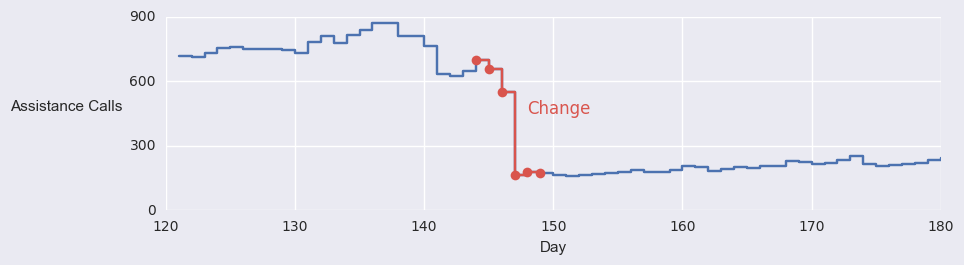

In [12]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
fig.set_facecolor('#EAEAF2')
ax.step(x,signal, where='post')
ax.set_ylabel('Assistance Calls', 
              rotation=0,
              ha='right', # horizontalalignment
              ma='left', # multiline alignment
             )
ax.set_xlabel('Day')
ax.plot(x[23:29], signal[23:29], 'o', color=sns.xkcd_rgb['pale red'])
ax.step(x[23:29], signal[23:29], color=sns.xkcd_rgb['pale red'], where='post')
ax.set_ylim(0, 900)
fewer_ticks(ax, xy='y', decimals=1, nticks=4) 
ax.text(148,
        450,
        'Change',
        ha='left',
        color=sns.xkcd_rgb['pale red'],
       )